In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51380_U')

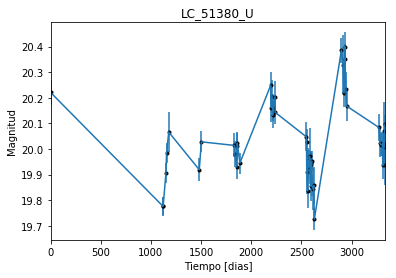

In [2]:
data = np.genfromtxt('LC_51380_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51380_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

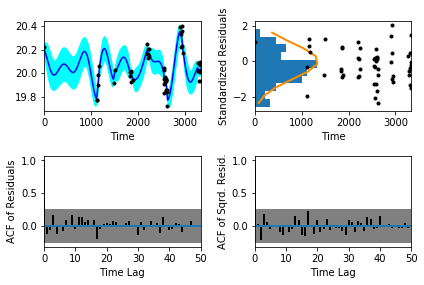

In [5]:
sample.assess_fit()

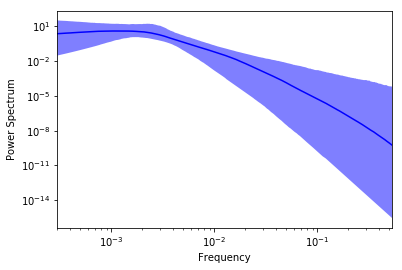

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51380_U')

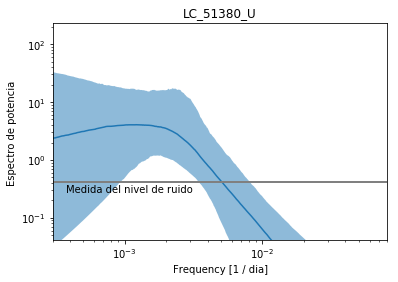

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51380_U')

Text(0.5,1,'Prediccion , valor esperado LC_51380_U')

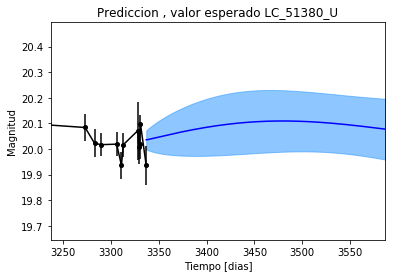

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51380_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51380_U')

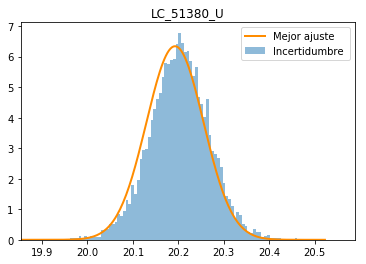

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51380_U')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_U')

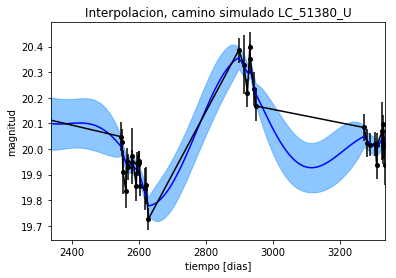

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_U')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_U')

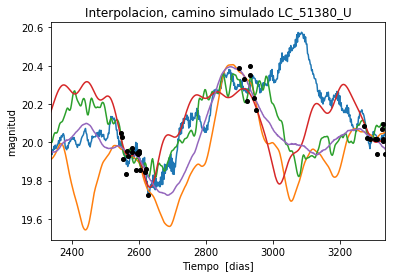

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 416.199646592
Median: 0.0136294516062
Standard deviation: 0.184650706906
68% credibility interval: [ 0.00101145  0.17121513]
95% credibility interval: [  3.82614994e-04   7.53741855e-01]
99% credibility interval: [  3.15569045e-04   9.59624542e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 342.979811601
Median: 0.00266028389316
Standard deviation: 0.0745519881839
68% credibility interval: [ 0.00063157  0.03881558]
95% credibility interval: [ 0.00034079  0.23152312]
99% credibility interval: [  3.08771388e-04   5.05024101e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 210.734072011
Median: 0.0104069810949
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1016.71437708
Median: 84.7447624876
Standard deviation: 1.70912306541
68% credibility interval: [ 82.89713316  86.04283205]
95% credibility interval: [ 80.33806364  86.98425538]
99% credibility interval: [ 78.27234495  87.42583502]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 940.092687917
Median: 0.632085810618
Standard deviation: 1.96679726196
68% credibility interval: [ 0.08202738  3.44747394]
95% credibility interval: [ 0.02062521  6.66357793]
99% credibility interval: [ 0.0119175   9.73413924]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 545.252589618
Median: 0.253019194875
Standard deviation: 8.28541970063
68% credibility interval: [ 0.00991055  5.49972575]
95% credibility interval: [  1.09270159e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 991.79335256
Median: 6646813.60546
Standard deviation: 7.16114603151e+148
68% credibility interval: [  2.41230247e-54   2.04294283e+50]
95% credibility interval: [  5.15582597e-129   2.84012547e+134]
99% credibility interval: [  2.99884242e-150   4.07873602e+147]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2634.17280734
Median: 20.0524144799
Standard deviation: 0.0626483604669
68% credibility interval: [ 19.99818507  20.10327077]
95% credibility interval: [ 19.92106663  20.17552159]
99% credibility interval: [ 19.84921984  20.251684  ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 235.678669052
Median: 0.0039872935666
Standard deviation: 0.228083456766
68% credibility interval: [ 0.          0.28420299]
95% credibility interval: [ 0.          0.86685097]
99% credibility interval: [ 0.          1.03122657]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 235.678669052
Median: 0.0039872935666
Standard deviation: 0.228083456766
68% credibility interval: [ 0.          0.28420299]
95% credibility interval: [ 0.          0.86685097]
99% credibility interval: [ 0.          1.03122657]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 367.943971615
Median: 0.0
Standard deviation: 0.00108347893633
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1016.71437708
Median: 84.7447624876
Standard deviation: 1.70912306541
68% credibility interval: [ 82.89713316  86.04283205]
95% credibility interval: [ 80.33806364  86.98425538]
99% credibility interval: [ 78.27234495  87.42583502]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3095.72067509
Median: 0.0311430896776
Standard deviation: 0.0260483051581
68% credibility interval: [ 0.01918147  0.0537524 ]
95% credibility interval: [ 0.01335794  0.09854477]
99% credibility interval: [ 0.01062869  0.16886391]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1233.00403066
Median: 0.972240867146
Standard deviation: 0.165865188958
68% credibility interval: [ 0.83190531  1.14531438]
95% credibility interval: [ 0.70751615  1.35827254]
99% credibility interval: [ 0.63834714  1.54299813]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 677.842396547
Median: 3.34060359019e-10
Standard deviation: 0.156984248208
68% credibility interval: [  9.69987116e-54   3.13696535e-03]
95% credibility interval: [  4.59172619e-138   9.84895933e-002]
99% credibility interval: [  2.23337189e-151   8.41989184e-001]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 416.199646592
Median: (-0.0856363700769-1.61739219223j)
Standard deviation: 1.84385473057
68% credibility interval: [-1.07577636-0.14950634j -0.00635512-0.19331592j]
95% credibility interval: [ -4.73589975e+00-5.37083966j  -2.40404091e-03-0.01481626j]
99% credibility interval: [ -6.02949882e+00+0.j          -1.98277879e-03-0.01470366j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 342.979811601
Median: (-0.0167150566704+0.00861481040252j)
Standard deviation: 1.50770346584
68% credibility interval: [-0.24388545+2.38596075j -0.00396825+0.0182626j ]
95% credibility interval: [-1.45470267+0.j -0.00214125+0.j]
99% credibility interval: [ -3.17316001e+00+1.55887946j  -1.94006785e-03+0.01002596j]
Posterior summary for param